# Load Model

In [1]:
from initialiser import build_dataset, build_model
from config import config
import polars as pl

from tqdm import tqdm

from util.persist import load_model

from util.metrics import create_forecast_plot


from collections import defaultdict


import torch
import matplotlib.pyplot as plt

from model.loss import losses

from tqdm import tqdm


from evaluation.real_eval import create_eval_dataloaders

from evaluation.run_evals import set_config

from util.config_util import config_deepcopy, dotdict
from evaluation.real_eval import (
    create_eval_dataloaders,
    illness_eval_config,
    ett_h_1_eval_config,
    ett_h_2_eval_config,
    traffic_eval_config,
    etl,
)

import torch

from glob import glob


model_path =  "LaT-PFN/2tbs1d2c/checkpoints/epoch=1999-step=250000.ckpt"


device = "cuda"

model_arch = build_model(
    width=8,
    config=config,
    n_outputs=100,
    use_mup_parametrization=True,
    load_base_shapes=True,
    build_base_shapes=True,
)

model = load_model(model_path, model_arch, device)

model = model.to(device)

denormalize = False

eval_config = config_deepcopy(config)
eval_config.epochs = 1
eval_config.stride = 1
eval_config.denormalise = denormalize
eval_config.denormalize_targets = denormalize
eval_config.denormalize = denormalize


eval_datasets = create_eval_dataloaders(
    config=eval_config,
    illness_eval_config=set_config(
        config_deepcopy(dotdict(illness_eval_config)), True, denormalize
    ),
    ett_h_1_eval_config=set_config(
        config_deepcopy(dotdict(ett_h_1_eval_config)), True, denormalize
    ),
    ett_h_2_eval_config=set_config(
        config_deepcopy(dotdict(ett_h_2_eval_config)), True, denormalize
    ),
    traffic_eval_config=set_config(
        config_deepcopy(dotdict(traffic_eval_config)), True, denormalize
    ),
    etl=set_config(config_deepcopy(dotdict(etl)), True, denormalize),
    use_infinity_loader=False,
)

loss = losses[config.loss](
    reduction="mean", device=config.device, **config.get(f"loss_{config.loss}", {})
)

Seed set to 42


Ignoring kwargs: LaTPFNV4() {}
d_model 512
using mup parametrization True


/home/ec2-user/LaT_PFN/research-pfn/venv/lib/python3.10/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Ignoring kwargs: LaTPFNV4() {}
d_model 64
using mup parametrization True
Ignoring kwargs: LaTPFNV4() {}
d_model 128
using mup parametrization True
CrossEntropyLoss ignores {}


# Example forecasting

  0%|          | 0/5 [00:00<?, ?it/s]

evaluating on: ett_h_1


Dataset ett_h_1
T_context_history: torch.Size([4, 12, 180, 1])
T_context_prompt: torch.Size([4, 12, 60, 1])
V_context_history: torch.Size([4, 12, 180, 1])
V_context_prompt: torch.Size([4, 12, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
forecast: torch.Size([4, 2, 60, 100])
latent_forecast: torch.Size([4, 2, 60, 512])
backcast: torch.Size([4, 2, 180, 100])


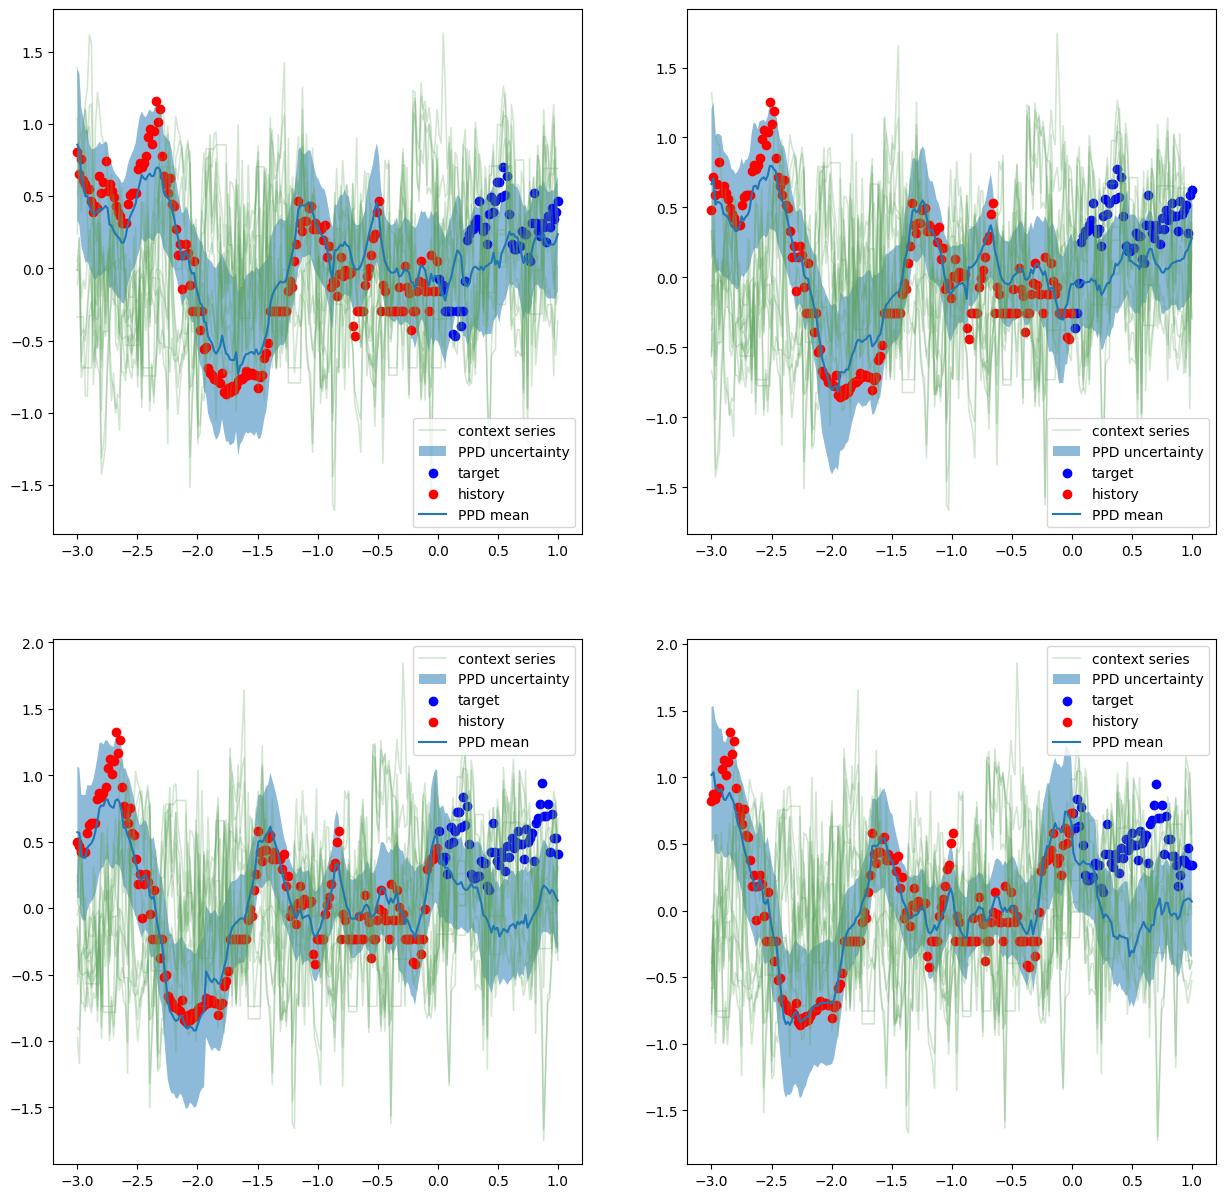

 20%|██        | 1/5 [00:02<00:10,  2.50s/it]

evaluating on: ett_h_2


Dataset ett_h_2
T_context_history: torch.Size([4, 4, 180, 1])
T_context_prompt: torch.Size([4, 4, 60, 1])
V_context_history: torch.Size([4, 4, 180, 1])
V_context_prompt: torch.Size([4, 4, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
forecast: torch.Size([4, 2, 60, 100])
latent_forecast: torch.Size([4, 2, 60, 512])
backcast: torch.Size([4, 2, 180, 100])


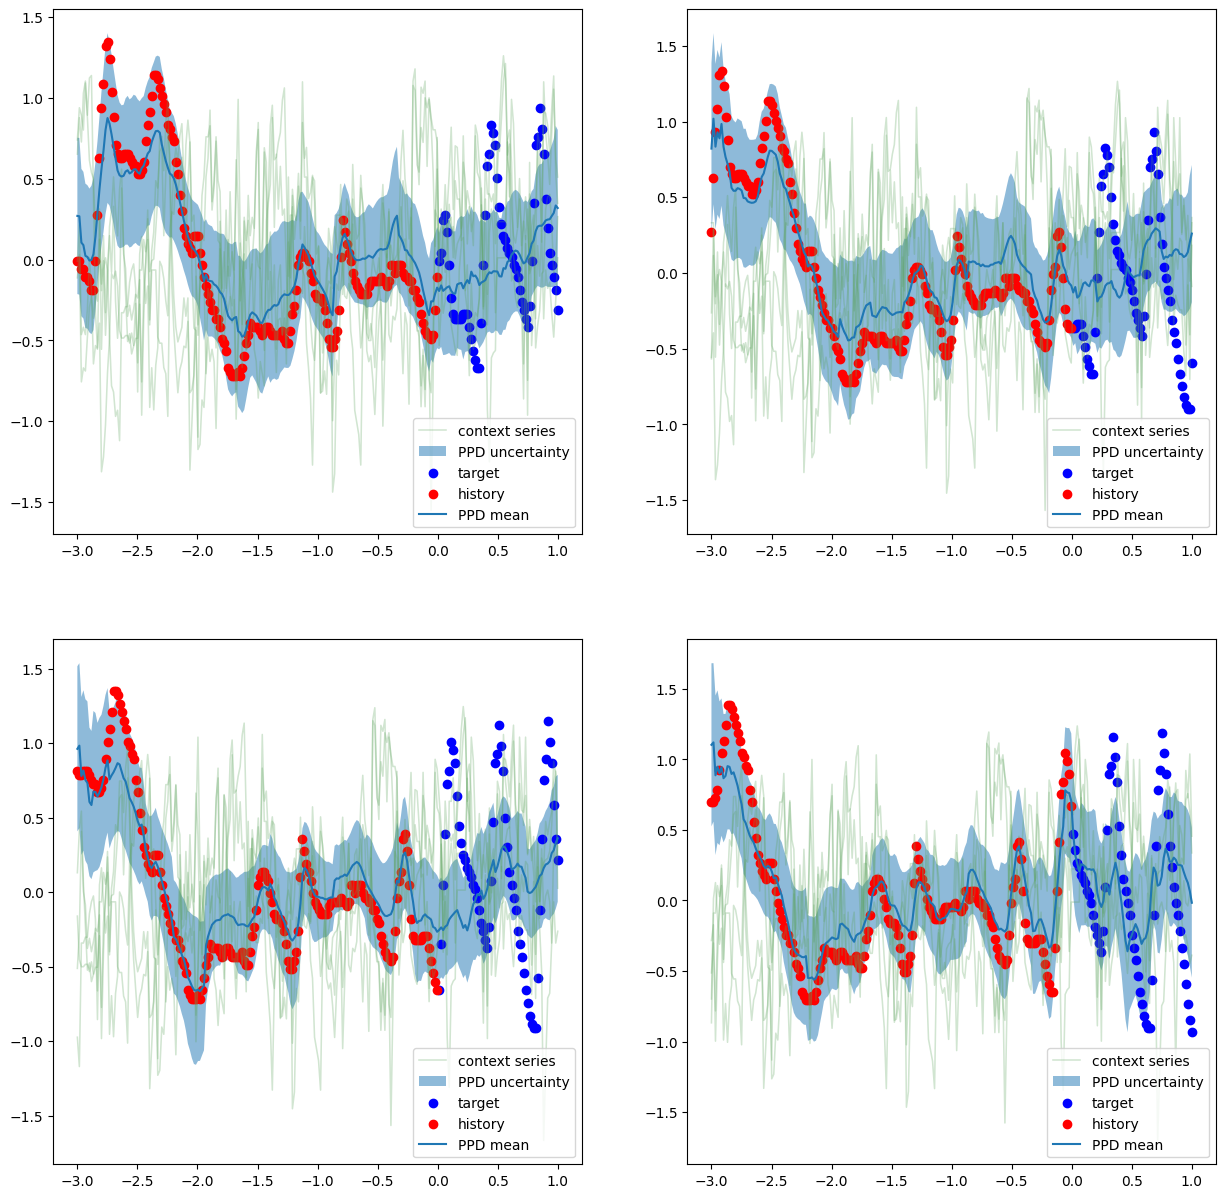

 40%|████      | 2/5 [00:03<00:05,  1.79s/it]

evaluating on: traffic


Dataset traffic
T_context_history: torch.Size([2, 8, 180, 1])
T_context_prompt: torch.Size([2, 8, 60, 1])
V_context_history: torch.Size([2, 8, 180, 1])
V_context_prompt: torch.Size([2, 8, 60, 1])
T_heldout_history: torch.Size([2, 2, 180, 1])
T_heldout_prompt: torch.Size([2, 2, 60, 1])
V_heldout_history: torch.Size([2, 2, 180, 1])
V_heldout_prompt: torch.Size([2, 2, 60, 1])
forecast: torch.Size([2, 2, 60, 100])
latent_forecast: torch.Size([2, 2, 60, 512])
backcast: torch.Size([2, 2, 180, 100])


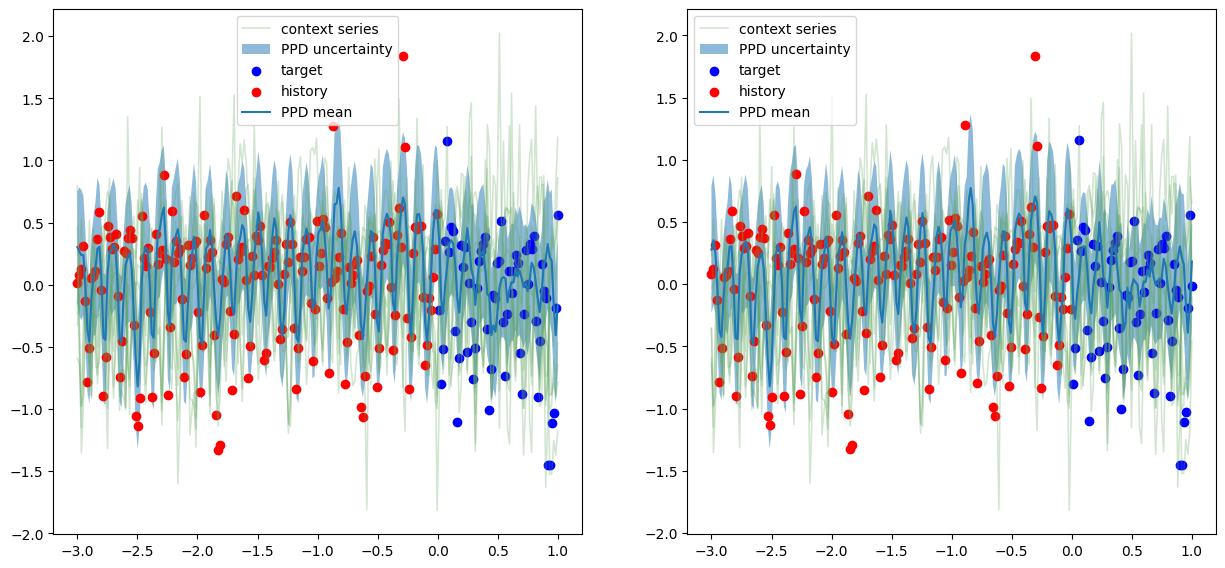

 60%|██████    | 3/5 [00:04<00:02,  1.35s/it]

evaluating on: etl


Dataset etl
T_context_history: torch.Size([4, 30, 180, 1])
T_context_prompt: torch.Size([4, 30, 60, 1])
V_context_history: torch.Size([4, 30, 180, 1])
V_context_prompt: torch.Size([4, 30, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
forecast: torch.Size([4, 2, 60, 100])
latent_forecast: torch.Size([4, 2, 60, 512])
backcast: torch.Size([4, 2, 180, 100])


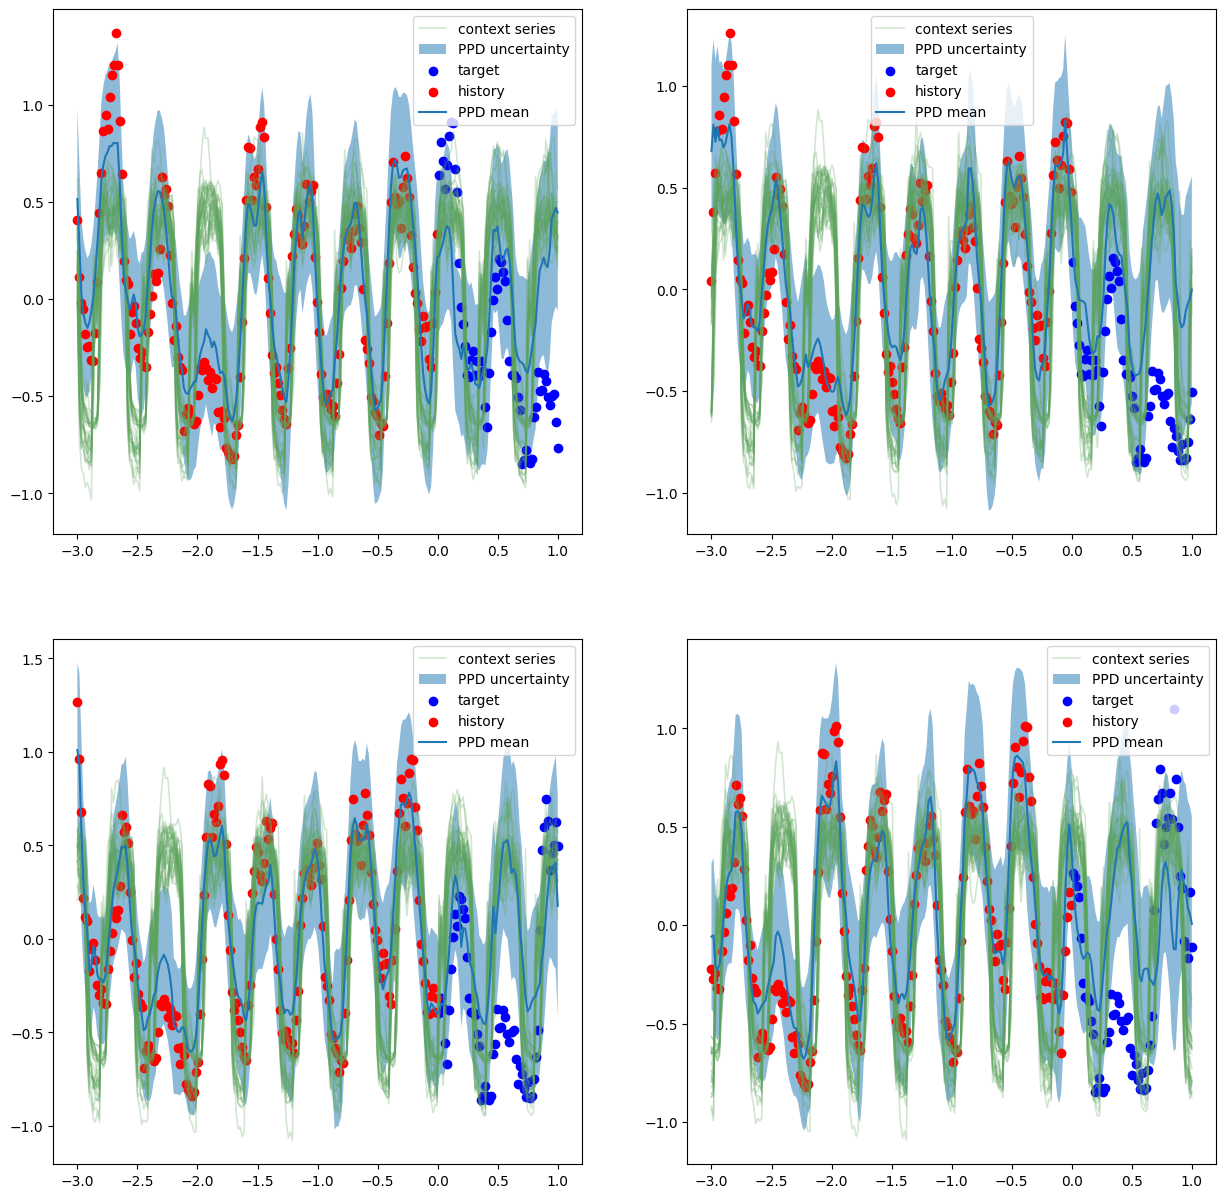

 80%|████████  | 4/5 [00:07<00:01,  1.79s/it]

evaluating on: illness


Dataset illness
T_context_history: torch.Size([4, 8, 120, 1])
T_context_prompt: torch.Size([4, 8, 40, 1])
V_context_history: torch.Size([4, 8, 120, 1])
V_context_prompt: torch.Size([4, 8, 40, 1])
T_heldout_history: torch.Size([4, 2, 120, 1])
T_heldout_prompt: torch.Size([4, 2, 40, 1])
V_heldout_history: torch.Size([4, 2, 120, 1])
V_heldout_prompt: torch.Size([4, 2, 40, 1])
forecast: torch.Size([4, 2, 40, 100])
latent_forecast: torch.Size([4, 2, 40, 512])
backcast: torch.Size([4, 2, 120, 100])


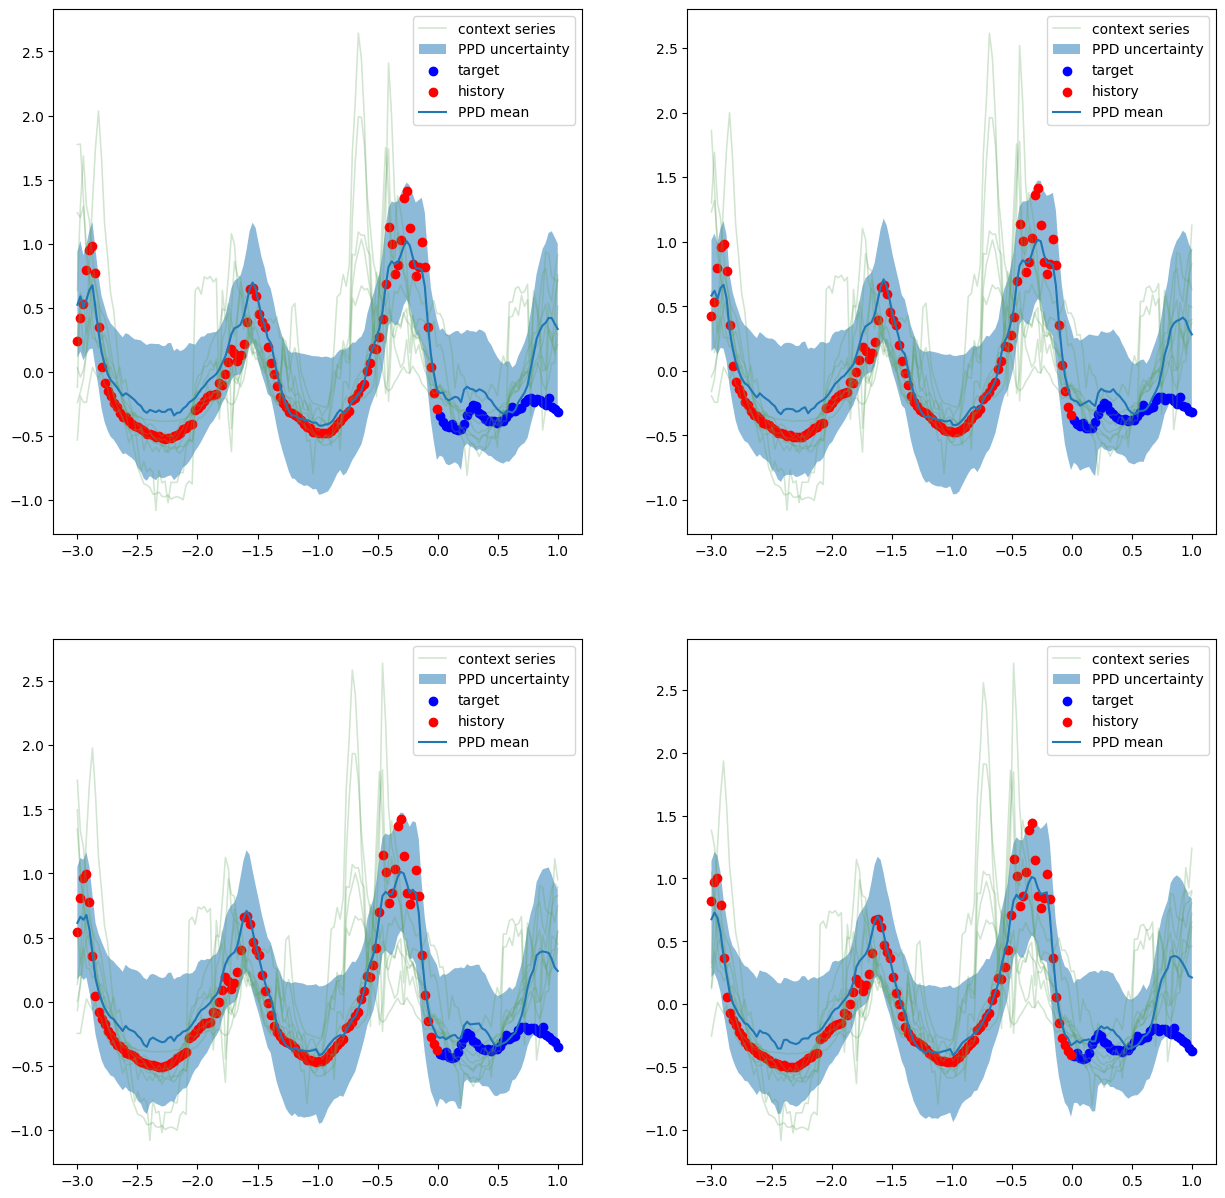

100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


In [2]:
with torch.no_grad():

    for ds_name, loader in tqdm(eval_datasets.items()):

        print(f"evaluating on: {ds_name}")

        for ii, batch in enumerate(tqdm(iter(loader()))):

            (
                T_context_history,  # examples X history
                T_context_prompt,  # examples X prompts
                V_context_history,  # examples Y history
                V_context_prompt,  # examples targets
                T_heldout_history,  # decoder X history
                T_heldout_prompt,  # decoder X prompts
                V_heldout_history,  # decoder Y history
                V_heldout_prompt,  # targets
                # hyperprior_params_context,  # hyperprior params for context
                # hyperprior_params_heldout,  # hyperprior params for heldout
            ) = batch

            if T_context_history.shape[0] < 2:
                continue

            print(f"Dataset {ds_name}")
            print(f"T_context_history: {T_context_history.shape}")
            print(f"T_context_prompt: {T_context_prompt.shape}")
            print(f"V_context_history: {V_context_history.shape}")
            print(f"V_context_prompt: {V_context_prompt.shape}")
            print(f"T_heldout_history: {T_heldout_history.shape}")
            print(f"T_heldout_prompt: {T_heldout_prompt.shape}")
            print(f"V_heldout_history: {V_heldout_history.shape}")
            print(f"V_heldout_prompt: {V_heldout_prompt.shape}")

            # forward

            forecasts = model.create_forecast(
                T_context_history.cuda(),  # examples X history
                T_context_prompt.cuda(),  # examples X prompts
                V_context_history.cuda(),  # examples Y history
                V_context_prompt.cuda(),  # examples targets
                T_heldout_history.cuda(),  # decoder X history
                T_heldout_prompt.cuda(),  # decoder X prompts
                V_heldout_history.cuda(),  # decoder Y history
            )

            for key, val in forecasts.items():
                print(f"{key}: {val.shape}")

            logits, backcast_logits = forecasts["forecast"], forecasts["backcast"]
            model_output = loss.prepare_output(
                torch.cat([backcast_logits, logits], dim=-2)
            )

            mean = loss.output_to_mean(
                model_output
            )  # use as the mean back- and forecast
            var = loss.output_to_std(
                model_output
            )  # use as the variance of the back- and forecast

            fig = create_forecast_plot(
                T_context_history.cuda(),
                T_context_prompt.cuda(),
                V_context_history.cuda(),
                V_context_prompt.cuda(),
                T_heldout_history.cuda(),
                T_heldout_prompt.cuda(),
                V_heldout_history.cuda(),
                V_heldout_prompt.cuda(),
                model,
                device,
                loss,
            )

            plt.show()
            plt.close()

            break

# Example embedding per timestep

In [3]:
with torch.no_grad():

    for ds_name, loader in tqdm(eval_datasets.items()):

        print(f"evaluating on: {ds_name}")

        for ii, batch in enumerate(tqdm(iter(loader()))):

            (
                T_context_history,  # examples X history
                T_context_prompt,  # examples X prompts
                V_context_history,  # examples Y history
                V_context_prompt,  # examples targets
                T_heldout_history,  # decoder X history
                T_heldout_prompt,  # decoder X prompts
                V_heldout_history,  # decoder Y history
                V_heldout_prompt,  # targets
                # hyperprior_params_context,  # hyperprior params for context
                # hyperprior_params_heldout,  # hyperprior params for heldout
            ) = batch

            if T_context_history.shape[0] < 2:
                continue

            print(f"Dataset {ds_name}")
            print(f"T_context_history: {T_context_history.shape}")
            print(f"T_context_prompt: {T_context_prompt.shape}")
            print(f"V_context_history: {V_context_history.shape}")
            print(f"V_context_prompt: {V_context_prompt.shape}")
            print(f"T_heldout_history: {T_heldout_history.shape}")
            print(f"T_heldout_prompt: {T_heldout_prompt.shape}")
            print(f"V_heldout_history: {V_heldout_history.shape}")
            print(f"V_heldout_prompt: {V_heldout_prompt.shape}")

            # forward

            embeddings = model.create_embeddings(
                torch.cat(
                    [
                        torch.cat([T_context_history, T_context_prompt], dim=-2),
                        torch.cat([T_heldout_history, T_heldout_prompt], dim=-2),
                    ],
                    dim=1,
                ).cuda(),
                torch.cat(
                    [
                        torch.cat([V_context_history, V_context_prompt], dim=-2),
                        torch.cat([V_heldout_history, V_heldout_prompt], dim=-2),
                    ],
                    dim=1,
                ).cuda(),
            )

            for key, val in embeddings.items():
                print(f"{key}: {val.shape}")

            latent_full = embeddings["per_timestep_embedding"]  # use as the per-timestep embedding

            break
            

  0%|          | 0/5 [00:00<?, ?it/s]

evaluating on: ett_h_1


 20%|██        | 1/5 [00:00<00:02,  1.72it/s]

Dataset ett_h_1
T_context_history: torch.Size([4, 12, 180, 1])
T_context_prompt: torch.Size([4, 12, 60, 1])
V_context_history: torch.Size([4, 12, 180, 1])
V_context_prompt: torch.Size([4, 12, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
per_timestep_embedding: torch.Size([4, 14, 240, 512])
per_series_summary_embedding: torch.Size([4, 14, 512])
evaluating on: ett_h_2


 40%|████      | 2/5 [00:00<00:01,  2.60it/s]

Dataset ett_h_2
T_context_history: torch.Size([4, 4, 180, 1])
T_context_prompt: torch.Size([4, 4, 60, 1])
V_context_history: torch.Size([4, 4, 180, 1])
V_context_prompt: torch.Size([4, 4, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
per_timestep_embedding: torch.Size([4, 6, 240, 512])
per_series_summary_embedding: torch.Size([4, 6, 512])
evaluating on: traffic


 60%|██████    | 3/5 [00:00<00:00,  3.78it/s]

Dataset traffic
T_context_history: torch.Size([2, 8, 180, 1])
T_context_prompt: torch.Size([2, 8, 60, 1])
V_context_history: torch.Size([2, 8, 180, 1])
V_context_prompt: torch.Size([2, 8, 60, 1])
T_heldout_history: torch.Size([2, 2, 180, 1])
T_heldout_prompt: torch.Size([2, 2, 60, 1])
V_heldout_history: torch.Size([2, 2, 180, 1])
V_heldout_prompt: torch.Size([2, 2, 60, 1])
per_timestep_embedding: torch.Size([2, 10, 240, 512])
per_series_summary_embedding: torch.Size([2, 10, 512])
evaluating on: etl


 80%|████████  | 4/5 [00:01<00:00,  2.40it/s]

Dataset etl
T_context_history: torch.Size([4, 30, 180, 1])
T_context_prompt: torch.Size([4, 30, 60, 1])
V_context_history: torch.Size([4, 30, 180, 1])
V_context_prompt: torch.Size([4, 30, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
per_timestep_embedding: torch.Size([4, 32, 240, 512])
per_series_summary_embedding: torch.Size([4, 32, 512])
evaluating on: illness


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

Dataset illness
T_context_history: torch.Size([4, 8, 120, 1])
T_context_prompt: torch.Size([4, 8, 40, 1])
V_context_history: torch.Size([4, 8, 120, 1])
V_context_prompt: torch.Size([4, 8, 40, 1])
T_heldout_history: torch.Size([4, 2, 120, 1])
T_heldout_prompt: torch.Size([4, 2, 40, 1])
V_heldout_history: torch.Size([4, 2, 120, 1])
V_heldout_prompt: torch.Size([4, 2, 40, 1])
per_timestep_embedding: torch.Size([4, 10, 160, 512])
per_series_summary_embedding: torch.Size([4, 10, 512])


# Example fixed-length summary embeddings

  0%|          | 0/5 [00:00<?, ?it/s]

evaluating on: ett_h_1


Dataset ett_h_1
T_context_history: torch.Size([4, 12, 180, 1])
T_context_prompt: torch.Size([4, 12, 60, 1])
V_context_history: torch.Size([4, 12, 180, 1])
V_context_prompt: torch.Size([4, 12, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])


 20%|██        | 1/5 [00:00<00:03,  1.15it/s]

evaluating on: ett_h_2


 40%|████      | 2/5 [00:01<00:01,  1.65it/s]

Dataset ett_h_2
T_context_history: torch.Size([4, 4, 180, 1])
T_context_prompt: torch.Size([4, 4, 60, 1])
V_context_history: torch.Size([4, 4, 180, 1])
V_context_prompt: torch.Size([4, 4, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
evaluating on: traffic


 60%|██████    | 3/5 [00:01<00:00,  2.60it/s]

Dataset traffic
T_context_history: torch.Size([2, 8, 180, 1])
T_context_prompt: torch.Size([2, 8, 60, 1])
V_context_history: torch.Size([2, 8, 180, 1])
V_context_prompt: torch.Size([2, 8, 60, 1])
T_heldout_history: torch.Size([2, 2, 180, 1])
T_heldout_prompt: torch.Size([2, 2, 60, 1])
V_heldout_history: torch.Size([2, 2, 180, 1])
V_heldout_prompt: torch.Size([2, 2, 60, 1])
evaluating on: etl


 80%|████████  | 4/5 [00:02<00:00,  1.89it/s]

Dataset etl
T_context_history: torch.Size([4, 30, 180, 1])
T_context_prompt: torch.Size([4, 30, 60, 1])
V_context_history: torch.Size([4, 30, 180, 1])
V_context_prompt: torch.Size([4, 30, 60, 1])
T_heldout_history: torch.Size([4, 2, 180, 1])
T_heldout_prompt: torch.Size([4, 2, 60, 1])
V_heldout_history: torch.Size([4, 2, 180, 1])
V_heldout_prompt: torch.Size([4, 2, 60, 1])
evaluating on: illness


100%|██████████| 5/5 [00:02<00:00,  2.05it/s]


Dataset illness
T_context_history: torch.Size([4, 8, 120, 1])
T_context_prompt: torch.Size([4, 8, 40, 1])
V_context_history: torch.Size([4, 8, 120, 1])
V_context_prompt: torch.Size([4, 8, 40, 1])
T_heldout_history: torch.Size([4, 2, 120, 1])
T_heldout_prompt: torch.Size([4, 2, 40, 1])
V_heldout_history: torch.Size([4, 2, 120, 1])
V_heldout_prompt: torch.Size([4, 2, 40, 1])
electricity    1216
illness         480
traffic          20
Name: count, dtype: int64


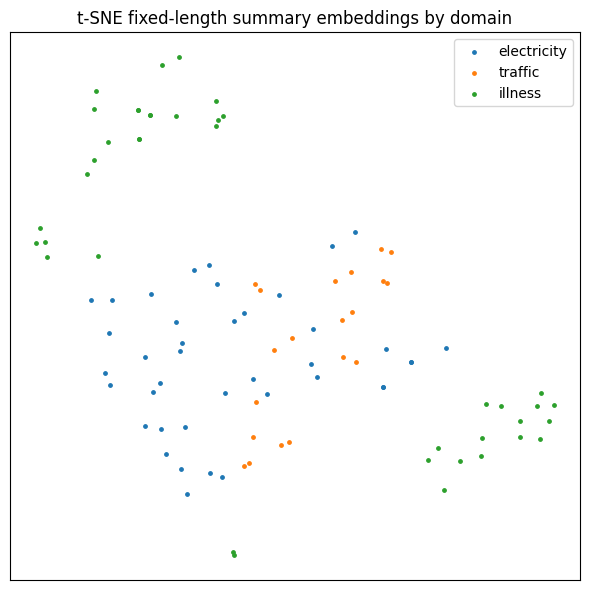

In [4]:

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE


all_embeddings = []

labels = []

with torch.no_grad():

    for ds_name, loader in tqdm(eval_datasets.items()):

        print(f"evaluating on: {ds_name}")

        for ii, batch in enumerate(tqdm(iter(loader()))):

            (
                T_context_history,  # examples X history
                T_context_prompt,  # examples X prompts
                V_context_history,  # examples Y history
                V_context_prompt,  # examples targets
                T_heldout_history,  # decoder X history
                T_heldout_prompt,  # decoder X prompts
                V_heldout_history,  # decoder Y history
                V_heldout_prompt,  # targets
                # hyperprior_params_context,  # hyperprior params for context
                # hyperprior_params_heldout,  # hyperprior params for heldout
            ) = batch

            if T_context_history.shape[0] < 2:
                continue

            if ii == 0:
                print(f"Dataset {ds_name}")
                print(f"T_context_history: {T_context_history.shape}")
                print(f"T_context_prompt: {T_context_prompt.shape}")
                print(f"V_context_history: {V_context_history.shape}")
                print(f"V_context_prompt: {V_context_prompt.shape}")
                print(f"T_heldout_history: {T_heldout_history.shape}")
                print(f"T_heldout_prompt: {T_heldout_prompt.shape}")
                print(f"V_heldout_history: {V_heldout_history.shape}")
                print(f"V_heldout_prompt: {V_heldout_prompt.shape}")

            # forward

            embeddings = model.create_embeddings(
                torch.cat(
                    [
                        torch.cat([T_context_history, T_context_prompt], dim=-2),
                        torch.cat([T_heldout_history, T_heldout_prompt], dim=-2),
                    ],
                    dim=1,
                ).cuda(),
                torch.cat(
                    [
                        torch.cat([V_context_history, V_context_prompt], dim=-2),
                        torch.cat([V_heldout_history, V_heldout_prompt], dim=-2),
                    ],
                    dim=1,
                ).cuda(),
            )
            
            summary_embeddings = embeddings["per_series_summary_embedding"]  # use as the fixed-length summary embedding

            flat_summary_embeddings = (
                summary_embeddings.flatten(0, 1).cpu()
            )

            all_embeddings.append(flat_summary_embeddings)
            for _ in range(flat_summary_embeddings.shape[0]):
                labels.append(
                    ds_name.split("_")[0]
                    .replace("etl", "ett")
                    .replace("etc", "ett")
                    .replace("ett", "electricity")
                )

            if ii > 10:
                break





all_embeddings = torch.cat(all_embeddings)

indices = []

labels = pd.Series(labels)
print(labels.value_counts())
count = labels.value_counts().min()

for label in labels.unique():
    abc = labels == label

    count_local = min(abc.sum(), count * 2)

    idxs = abc.argsort()[::-1][:count_local]

    indices.append(idxs.reset_index(drop=True))


indices = pd.concat(indices)

labels_new = labels[indices]
all_embeddings = all_embeddings[torch.from_numpy(indices.to_numpy())]


X_embedded = TSNE(
    n_components=2, learning_rate="auto", init="random", perplexity=30
).fit_transform(all_embeddings)


plt.figure(figsize=(6, 6))

per_section = defaultdict(list)

for vec, lab in zip(X_embedded, labels_new):
    per_section[lab].append(vec[np.newaxis, :])


for lab, vecs in per_section.items():

    concat_vecs = np.stack(vecs).squeeze()
    plt.scatter(concat_vecs[:, 0], concat_vecs[:, 1], label=lab, s=6)

plt.title("t-SNE fixed-length summary embeddings by domain")
plt.yticks([], [])
plt.xticks([], [])
plt.legend()
plt.tight_layout()
plt.show()